In [1]:
import pandas as pd
import requests
import tweepy
import json
import time
import os
import numpy as np
import re
import matplotlib.pyplot as plt
#get text Series without the ellipsis
pd.set_option('display.max_colwidth',1000)
% matplotlib inline

# Wrangle

## Gather

In [2]:
# read The WeRateDogs Twitter archive csv file as a pandas dataframe
archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#The tweet image predictions file, i.e., what breed of dog (or other object, animal, etc.)
#is present in each tweet according to a neural network.

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

#open a file to handle the content of the url
with open(url.split('/')[-1], mode = 'wb') as file:
    file.write(response.content)

In [4]:
# read the image predictions file as a pandas dataframe
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')

In [207]:
# my Twitter API keys, secrets, and tokens are replaced with these values
consumer_key = 'my consumer_key'
consumer_secret = 'my consumer_key'
access_token = 'my access_token'
access_secret = 'my access_secret'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

#This class provides a wrapper for the API as provided by Twitter
api = tweepy.API(auth,
                 wait_on_rate_limit_notify = True, #print a notification when Tweepy is waiting for rate limits to replenish
                       wait_on_rate_limit = True ) #wait for rate limits to replenish


In [ ]:
#initialize a list to have the dictionaries of the tweets data
tweets_list = []
#initialize a list to have the deleted tweets ids 
tweets_deleted = []
#initialize increment variable to increment 1 for each tweet id
increment = 1
#initialize the start_time to guage the time for the query from the twitter API
start_time = time.time()

for tweet_id in archive['tweet_id']:
    #print the increment variable and the tweet_id variable
        print (increment)
        print(tweet_id) 
        try:
            #get the tweet data for each tweet id
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            
            #get the needed parameters from the json tweet data
            likes_count = tweet._json['favorite_count']
            retweet_count = tweet._json['retweet_count']
            tweet_user_name = tweet._json['user']['name']
            user_favorited = tweet._json['favorited']
            
            #append each tweet data collected to the list of dictionaries
            tweets_list.append({'tweet_id': int(tweet_id),
                               'likes_count': int(likes_count),
                               'retweet_count': int(retweet_count),
                               'user_name': str(tweet_user_name),
                               'favorited': bool(user_favorited) })
            
        #for every tweet that is deleted, its id will be added to a list    
        except Exception as e:
            tweets_deleted.append(tweet_id)
            print(str(tweet_id)+'_'+str(e))
        
        increment = increment+1
        
#initialize the end_time to guage the time for the query from the twitter API       
end_time = time.time()
period_time = end_time - start_time
print('the time spended for generating the tweets data list is :'+ str(period_time/60)+' minutes')

1
892420643555336193
892420643555336193_[{'code': 89, 'message': 'Invalid or expired token.'}]
2
892177421306343426
892177421306343426_[{'code': 89, 'message': 'Invalid or expired token.'}]
3
891815181378084864
891815181378084864_[{'code': 89, 'message': 'Invalid or expired token.'}]
4
891689557279858688
891689557279858688_[{'code': 89, 'message': 'Invalid or expired token.'}]
5
891327558926688256
891327558926688256_[{'code': 89, 'message': 'Invalid or expired token.'}]
6
891087950875897856
891087950875897856_[{'code': 89, 'message': 'Invalid or expired token.'}]
7
890971913173991426
890971913173991426_[{'code': 89, 'message': 'Invalid or expired token.'}]
8
890729181411237888
890729181411237888_[{'code': 89, 'message': 'Invalid or expired token.'}]
9
890609185150312448
890609185150312448_[{'code': 89, 'message': 'Invalid or expired token.'}]
10
890240255349198849
890240255349198849_[{'code': 89, 'message': 'Invalid or expired token.'}]
11
890006608113172480
890006608113172480_[{'code'

875747767867523072_[{'code': 89, 'message': 'Invalid or expired token.'}]
88
875144289856114688
875144289856114688_[{'code': 89, 'message': 'Invalid or expired token.'}]
89
875097192612077568
875097192612077568_[{'code': 89, 'message': 'Invalid or expired token.'}]
90
875021211251597312
875021211251597312_[{'code': 89, 'message': 'Invalid or expired token.'}]
91
874680097055178752
874680097055178752_[{'code': 89, 'message': 'Invalid or expired token.'}]
92
874434818259525634
874434818259525634_[{'code': 89, 'message': 'Invalid or expired token.'}]
93
874296783580663808
874296783580663808_[{'code': 89, 'message': 'Invalid or expired token.'}]
94
874057562936811520
874057562936811520_[{'code': 89, 'message': 'Invalid or expired token.'}]
95
874012996292530176
874012996292530176_[{'code': 89, 'message': 'Invalid or expired token.'}]
96
873697596434513921
873697596434513921_[{'code': 89, 'message': 'Invalid or expired token.'}]
97
873580283840344065
873580283840344065_[{'code': 89, 'messag

858843525470990336_[{'code': 89, 'message': 'Invalid or expired token.'}]
174
858471635011153920
858471635011153920_[{'code': 89, 'message': 'Invalid or expired token.'}]
175
858107933456039936
858107933456039936_[{'code': 89, 'message': 'Invalid or expired token.'}]
176
857989990357356544
857989990357356544_[{'code': 89, 'message': 'Invalid or expired token.'}]
177
857746408056729600
857746408056729600_[{'code': 89, 'message': 'Invalid or expired token.'}]
178
857393404942143489
857393404942143489_[{'code': 89, 'message': 'Invalid or expired token.'}]
179
857263160327368704
857263160327368704_[{'code': 89, 'message': 'Invalid or expired token.'}]
180
857214891891077121
857214891891077121_[{'code': 89, 'message': 'Invalid or expired token.'}]
181
857062103051644929
857062103051644929_[{'code': 89, 'message': 'Invalid or expired token.'}]
182
857029823797047296
857029823797047296_[{'code': 89, 'message': 'Invalid or expired token.'}]
183
856602993587888130
856602993587888130_[{'code': 8

843604394117681152_[{'code': 89, 'message': 'Invalid or expired token.'}]
260
843235543001513987
843235543001513987_[{'code': 89, 'message': 'Invalid or expired token.'}]
261
842892208864923648
842892208864923648_[{'code': 89, 'message': 'Invalid or expired token.'}]
262
842846295480000512
842846295480000512_[{'code': 89, 'message': 'Invalid or expired token.'}]
263
842765311967449089
842765311967449089_[{'code': 89, 'message': 'Invalid or expired token.'}]
264
842535590457499648
842535590457499648_[{'code': 89, 'message': 'Invalid or expired token.'}]
265
842163532590374912
842163532590374912_[{'code': 89, 'message': 'Invalid or expired token.'}]
266
842115215311396866
842115215311396866_[{'code': 89, 'message': 'Invalid or expired token.'}]
267
841833993020538882
841833993020538882_[{'code': 89, 'message': 'Invalid or expired token.'}]
268
841680585030541313
841680585030541313_[{'code': 89, 'message': 'Invalid or expired token.'}]
269
841439858740625411
841439858740625411_[{'code': 8

832040443403784192_[{'code': 89, 'message': 'Invalid or expired token.'}]
345
832032802820481025
832032802820481025_[{'code': 89, 'message': 'Invalid or expired token.'}]
346
831939777352105988
831939777352105988_[{'code': 89, 'message': 'Invalid or expired token.'}]
347
831926988323639298
831926988323639298_[{'code': 89, 'message': 'Invalid or expired token.'}]
348
831911600680497154
831911600680497154_[{'code': 89, 'message': 'Invalid or expired token.'}]
349
831670449226514432
831670449226514432_[{'code': 89, 'message': 'Invalid or expired token.'}]
350
831650051525054464
831650051525054464_[{'code': 89, 'message': 'Invalid or expired token.'}]
351
831552930092285952
831552930092285952_[{'code': 89, 'message': 'Invalid or expired token.'}]
352
831322785565769729
831322785565769729_[{'code': 89, 'message': 'Invalid or expired token.'}]
353
831315979191906304
831315979191906304_[{'code': 89, 'message': 'Invalid or expired token.'}]
354
831309418084069378
831309418084069378_[{'code': 8

821149554670182400_[{'code': 89, 'message': 'Invalid or expired token.'}]
430
821107785811234820
821107785811234820_[{'code': 89, 'message': 'Invalid or expired token.'}]
431
821044531881721856
821044531881721856_[{'code': 89, 'message': 'Invalid or expired token.'}]
432
820837357901512704
820837357901512704_[{'code': 89, 'message': 'Invalid or expired token.'}]
433
820749716845686786
820749716845686786_[{'code': 89, 'message': 'Invalid or expired token.'}]
434
820690176645140481
820690176645140481_[{'code': 89, 'message': 'Invalid or expired token.'}]
435
820494788566847489
820494788566847489_[{'code': 89, 'message': 'Invalid or expired token.'}]
436
820446719150292993
820446719150292993_[{'code': 89, 'message': 'Invalid or expired token.'}]
437
820314633777061888
820314633777061888_[{'code': 89, 'message': 'Invalid or expired token.'}]
438
820078625395449857
820078625395449857_[{'code': 89, 'message': 'Invalid or expired token.'}]
439
820013781606658049
820013781606658049_[{'code': 8

811647686436880384_[{'code': 89, 'message': 'Invalid or expired token.'}]
515
811627233043480576
811627233043480576_[{'code': 89, 'message': 'Invalid or expired token.'}]
516
811386762094317568
811386762094317568_[{'code': 89, 'message': 'Invalid or expired token.'}]
517
810984652412424192
810984652412424192_[{'code': 89, 'message': 'Invalid or expired token.'}]
518
810896069567610880
810896069567610880_[{'code': 89, 'message': 'Invalid or expired token.'}]
519
810657578271330305
810657578271330305_[{'code': 89, 'message': 'Invalid or expired token.'}]
520
810284430598270976
810284430598270976_[{'code': 89, 'message': 'Invalid or expired token.'}]
521
810254108431155201
810254108431155201_[{'code': 89, 'message': 'Invalid or expired token.'}]
522
809920764300447744
809920764300447744_[{'code': 89, 'message': 'Invalid or expired token.'}]
523
809808892968534016
809808892968534016_[{'code': 89, 'message': 'Invalid or expired token.'}]
524
809448704142938112
809448704142938112_[{'code': 8

798682547630837760_[{'code': 89, 'message': 'Invalid or expired token.'}]
601
798673117451325440
798673117451325440_[{'code': 89, 'message': 'Invalid or expired token.'}]
602
798665375516884993
798665375516884993_[{'code': 89, 'message': 'Invalid or expired token.'}]
603
798644042770751489
798644042770751489_[{'code': 89, 'message': 'Invalid or expired token.'}]
604
798628517273620480
798628517273620480_[{'code': 89, 'message': 'Invalid or expired token.'}]
605
798585098161549313
798585098161549313_[{'code': 89, 'message': 'Invalid or expired token.'}]
606
798576900688019456
798576900688019456_[{'code': 89, 'message': 'Invalid or expired token.'}]
607
798340744599797760
798340744599797760_[{'code': 89, 'message': 'Invalid or expired token.'}]
608
798209839306514432
798209839306514432_[{'code': 89, 'message': 'Invalid or expired token.'}]
609
797971864723324932
797971864723324932_[{'code': 89, 'message': 'Invalid or expired token.'}]
610
797545162159308800
797545162159308800_[{'code': 8

788178268662984705_[{'code': 89, 'message': 'Invalid or expired token.'}]
686
788150585577050112
788150585577050112_[{'code': 89, 'message': 'Invalid or expired token.'}]
687
788070120937619456
788070120937619456_[{'code': 89, 'message': 'Invalid or expired token.'}]
688
788039637453406209
788039637453406209_[{'code': 89, 'message': 'Invalid or expired token.'}]
689
787810552592695296
787810552592695296_[{'code': 89, 'message': 'Invalid or expired token.'}]
690
787717603741622272
787717603741622272_[{'code': 89, 'message': 'Invalid or expired token.'}]
691
787397959788929025
787397959788929025_[{'code': 89, 'message': 'Invalid or expired token.'}]
692
787322443945877504
787322443945877504_[{'code': 89, 'message': 'Invalid or expired token.'}]
693
787111942498508800
787111942498508800_[{'code': 89, 'message': 'Invalid or expired token.'}]
694
786963064373534720
786963064373534720_[{'code': 89, 'message': 'Invalid or expired token.'}]
695
786729988674449408
786729988674449408_[{'code': 8

776819012571455488_[{'code': 89, 'message': 'Invalid or expired token.'}]
772
776813020089548800
776813020089548800_[{'code': 89, 'message': 'Invalid or expired token.'}]
773
776477788987613185
776477788987613185_[{'code': 89, 'message': 'Invalid or expired token.'}]
774
776249906839351296
776249906839351296_[{'code': 89, 'message': 'Invalid or expired token.'}]
775
776218204058357768
776218204058357768_[{'code': 89, 'message': 'Invalid or expired token.'}]
776
776201521193218049
776201521193218049_[{'code': 89, 'message': 'Invalid or expired token.'}]
777
776113305656188928
776113305656188928_[{'code': 89, 'message': 'Invalid or expired token.'}]
778
776088319444877312
776088319444877312_[{'code': 89, 'message': 'Invalid or expired token.'}]
779
775898661951791106
775898661951791106_[{'code': 89, 'message': 'Invalid or expired token.'}]
780
775842724423557120
775842724423557120_[{'code': 89, 'message': 'Invalid or expired token.'}]
781
775733305207554048
775733305207554048_[{'code': 8

764857477905154048_[{'code': 89, 'message': 'Invalid or expired token.'}]
857
764259802650378240
764259802650378240_[{'code': 89, 'message': 'Invalid or expired token.'}]
858
763956972077010945
763956972077010945_[{'code': 89, 'message': 'Invalid or expired token.'}]
859
763837565564780549
763837565564780549_[{'code': 89, 'message': 'Invalid or expired token.'}]
860
763183847194451968
763183847194451968_[{'code': 89, 'message': 'Invalid or expired token.'}]
861
763167063695355904
763167063695355904_[{'code': 89, 'message': 'Invalid or expired token.'}]
862
763103485927849985
763103485927849985_[{'code': 89, 'message': 'Invalid or expired token.'}]
863
762699858130116608
762699858130116608_[{'code': 89, 'message': 'Invalid or expired token.'}]
864
762471784394268675
762471784394268675_[{'code': 89, 'message': 'Invalid or expired token.'}]
865
762464539388485633
762464539388485633_[{'code': 89, 'message': 'Invalid or expired token.'}]
866
762316489655476224
762316489655476224_[{'code': 8

In [ ]:
#print the number of deleted tweets and the tweets that still exist
print('the number of the deleted tweets equals to '+str(len(tweets_deleted)))
print('the number of tweets that still exist equals to '+ str(len(tweets_list)) )

In [ ]:
# open the json file and write the tweets data in it
with open('tweet_json.txt', mode = 'w', encoding = 'utf-8') as file:
    file.write('['+'\n') 
    for item in tweets_list:
        json.dump(item, file) #write every dictionary in the json file
        file.write(','+'\n')  #separate the items with comma and new line
    file.seek(file.tell() - 2, os.SEEK_SET) # to delete the last comma generated in the loop put the cursor on it   
    file.truncate() #delete the last comma 
    file.write(']')    

In [5]:
#read the json file content into a list to convert it to a data frame
#initialize a list of dictionaries
api_list = []
#read from the tweet_json.txt file 
with open('tweet_json.txt', encoding = 'utf-8' ) as json_file:
    api_list = json.load(json_file)
    

In [6]:
#create a new data frame that have the json file content
df_api = pd.DataFrame(api_list, columns = ['tweet_id','likes_count','retweet_count','user_name','favorited' ])

In [7]:
#show the first five rows 
df_api.head()

,tweet_id,likes_count,retweet_count,user_name,favorited
0,892420643555336193,38297,8407,WeRateDogs™,False
1,892177421306343426,32823,6196,WeRateDogs™,False
2,891815181378084864,24724,4099,WeRateDogs™,False
3,891689557279858688,41641,8534,WeRateDogs™,False
4,891327558926688256,39814,9253,WeRateDogs™,False


## Assess

In [57]:
#see the structure of the archive dataframe
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [58]:
#see the structure of the image_predictions dataframe
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [59]:
#see the structure of the api_df dataframe
df_api

,tweet_id,likes_count,retweet_count,user_name,favorited
0,892420643555336193,38297,8407,WeRateDogs™,False
1,892177421306343426,32823,6196,WeRateDogs™,False
2,891815181378084864,24724,4099,WeRateDogs™,False
3,891689557279858688,41641,8534,WeRateDogs™,False
4,891327558926688256,39814,9253,WeRateDogs™,False
5,891087950875897856,19984,3076,WeRateDogs™,False
6,890971913173991426,11702,2041,WeRateDogs™,False
7,890729181411237888,64652,18640,WeRateDogs™,False
8,890609185150312448,27477,4214,WeRateDogs™,False
9,890240255349198849,31527,7299,WeRateDogs™,False


In [60]:
#see the null values and the data types of the archive dataframe
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [61]:
#see the null values and the data types in the image_prediction dataframe
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [62]:
#check the null values and the data types in df_api
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 5 columns):
tweet_id         2341 non-null int64
likes_count      2341 non-null int64
retweet_count    2341 non-null int64
user_name        2341 non-null object
favorited        2341 non-null bool
dtypes: bool(1), int64(3), object(1)
memory usage: 75.5+ KB


In [63]:
#see the values of the source series
archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [64]:
#check if there is any duplicated tweet_id
sum(archive['tweet_id'].duplicated())

0

In [65]:
#show the names of dogs
archive.name.value_counts()

None          745
a              55
Charlie        12
Oliver         11
Lucy           11
Cooper         11
Lola           10
Tucker         10
Penny          10
Winston         9
Bo              9
Sadie           8
the             8
Buddy           7
Daisy           7
Bailey          7
Toby            7
an              7
Rusty           6
Dave            6
Koda            6
Milo            6
Jack            6
Scout           6
Oscar           6
Jax             6
Bella           6
Leo             6
Stanley         6
Chester         5
             ... 
Rizzo           1
Kody            1
Cilantro        1
Dutch           1
Longfellow      1
Jay             1
Eazy            1
Ed              1
Durg            1
Furzey          1
Todo            1
Jebberson       1
Striker         1
Charleson       1
Crumpet         1
Sailer          1
Sully           1
Georgie         1
Randall         1
Brutus          1
Harlso          1
Kawhi           1
Harvey          1
Mona            1
Julio     

In [66]:

archive['text']

0                                                                This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1           This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
2                            This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
3                                                                      This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
4           This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
5           Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG

In [67]:
archive[archive['name'] == 'Charlie']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
230,847978865427394560,NaN,NaN,2017-04-01 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Charlie. He fell asleep on a heating vent. Would puppreciate your assistance. 11/10 someone help Charlie https://t.c…,8.323699e+17,4.196984e+09,2017-02-16 23:23:38 +0000,https://twitter.com/dog_rates/status/832369877331693569/photo/1,11,10,Charlie,None,None,None,None
254,844580511645339650,NaN,NaN,2017-03-22 16:04:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Charlie. He wants to know if you have a moment to talk about washing machine insurance policies. 11/10 would hear him out https://t.co/gAzPqT7uyk,NaN,NaN,NaN,https://twitter.com/dog_rates/status/844580511645339650/photo/1,11,10,Charlie,None,None,None,None
261,842846295480000512,NaN,NaN,2017-03-17 21:13:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Charlie. He's wishing you a very fun and safe St. Pawtrick's Day. 13/10 festive af https://t.co/nFpNgCWWYs,NaN,NaN,NaN,https://twitter.com/dog_rates/status/842846295480000512/photo/1,13,10,Charlie,None,None,None,None
326,833826103416520705,NaN,NaN,2017-02-20 23:50:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Charlie. She asked u to change the channel to Animal Planet at least 6 times. Now taking matters into her own paws. 13/10 assertive af https://t.co/WTzhtfevKY,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/833826103416520705/photo/1,https://twitter.com/dog_rates/status/833826103416520705/photo/1",13,10,Charlie,None,None,None,None
338,832369877331693569,NaN,NaN,2017-02-16 23:23:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Charlie. He fell asleep on a heating vent. Would puppreciate your assistance. 11/10 someone help Charlie https://t.co/Dhdx5HnQ4d,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832369877331693569/photo/1,11,10,Charlie,None,None,None,None
383,827199976799354881,NaN,NaN,2017-02-02 17:00:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Charlie. He wins every game of chess he plays. Won't let opponent pet him until they forfeit. 13/10 you win again Charlie https://t.co/UkyQibIBzZ,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/827199976799354881/photo/1,https://twitter.com/dog_rates/status/827199976799354881/photo/1,https://twitter.com/dog_rates/status/827199976799354881/photo/1,https://twitter.com/dog_rates/status/827199976799354881/photo/1",13,10,Charlie,None,None,None,None
813,771102124360998913,NaN,NaN,2016-08-31 21:47:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Charlie. He works for @TODAYshow. Super sneaky tongue slip here. 12/10 would pet until someone made me stop https://t.co/K5Jo7QRCvA,NaN,NaN,NaN,https://twitter.com/dog_rates/status/771102124360998913/photo/1,12,10,Charlie,None,None,None,None
932,754011816964026368,NaN,NaN,2016-07-15 17:56:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Charlie. He pouts until he gets to go on the swing. 12/10 manipulative af https://t.co/ilwQqWFKCh,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/754011816964026368/photo/1,https://twitter.com/dog_rates/status/754011816964026368/photo/1",12,10,Charlie,None,None,None,None
1358,703382836347330562,NaN,NaN,2016-02-27 00:55:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Charlie. He's a West Side Niddlewog. Mucho fluffy. 12/10 would pet so damn well https://t.co

In [68]:
#check for the tweets have a named word
archive[archive['text'].str.contains('named')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
603,798628517273620480,NaN,NaN,2016-11-15 20:47:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7,6.675094e+17,4.196984e+09,2015-11-20 01:06:48 +0000,"https://twitter.com/dog_rates/status/667509364010450944/photo/1,https://twitter.com/dog_rates/status/667509364010450944/photo/1",12,10,None,None,None,None,None
1853,675706639471788032,NaN,NaN,2015-12-12 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675706639471788032/photo/1,10,10,a,None,None,None,None
1955,673636718965334016,NaN,NaN,2015-12-06 22:54:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673636718965334016/photo/1,10,10,a,None,None,None,None
2034,671743150407421952,NaN,NaN,2015-12-01 17:30:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671743150407421952/photo/1,11,10,a,None,None,None,None
2066,671147085991960577,NaN,NaN,2015-11-30 02:01:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671147085991960577/photo/1,9,10,a,None,None,None,None
2116,670427002554466305,NaN,NaN,2015-11-28 02:20:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670427002554466305/photo/1,9,10,a,None,None,None,None
2125,670361874861563904,NaN,NaN,2015-11-27 22:01:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Rich Mahogany Seltzer named Cherokee. Just got destroyed by a snowball. Isn't very happy about it. 9/10 https://t.co/98ZBi6o4dj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670361874861563904/photo/1,9,10,a,None,None,None,None
2128,670303360680108032,NaN,NaN,2015-11-27 18:09:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8iN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670303360680108032/photo/1,9,10,a,None,None,None,None
2146,669923323644657664,NaN,NaN,2015-11-26 16:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a spotted Lipitor Rumpelstiltskin named Alphred. He can't wait for the Turkey. 10/10 would pet really well https://t.co/6GUGO7azNX,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669923323644657664/photo/1,10,10,a,None,None,None,None
2161,669564461267722241,NaN,NaN,2015-11-25 17:13:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Coria

In [69]:
#show the breeds names in the p1
image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Siberian_husky                20
Staffordshire_bullterrier     20
German_shepherd               20
Cardigan                      19
web_site                      19
Maltese_dog                   18
beagle                        18
Eskimo_dog                    18
Shetland_sheepdog             18
teddy                         18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

In [309]:
#statistical description for the archive dataframe
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [310]:
#see the text of tweets that have a rating_denominator is not equal to 10 
archive[archive.rating_denominator != 10][['text', 'rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


In [311]:
#see the text of tweet which has 1776 rating as numerator... it is a joke
archive[archive.rating_numerator == 1776][['text','rating_numerator']]

,text,rating_numerator
979,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776


In [312]:
#statistical description for image_predictions
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [313]:
#show the image row that has a p1_conf equal to 1, to see the other confs, it have to be 0 or very small number 
image_predictions[image_predictions['p1_conf'] == 1]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.0,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False


In [314]:
#statistical description for the df_api
df_api.describe()

,tweet_id,likes_count,retweet_count
count,2.341000e+03,2341.000000,2341.000000
mean,7.422089e+17,8018.252029,2961.208885
std,6.833609e+16,12381.352424,4971.935590
min,6.660209e+17,0.000000,0.000000
25%,6.783411e+17,1390.000000,595.000000
50%,7.186133e+17,3495.000000,1383.000000
75%,7.986979e+17,9835.000000,3451.000000
max,8.924206e+17,165068.000000,84389.000000


### Quality

##### archive table:
1.the `name` column has 'a', 'an','non', 'the' values, which are not names.

2.erroneous data types(`timestamp`,`tweet_id`).

3.there are retweeted tweets, that we want only the original ones.(visual assessment)

4.`rating_numerator` and `rating_denominator` have wrong ratings, like 7/11, 50/50, 24/7, and so on.....

5.`source` column should be shown clearly.

6.many tweets have evidencies to the stage of the dog in its text,  floof word is is evidence for the dog is floofer, pup word is evidence for the pupper dog, and sometimes the stage is reminded as a plural.(visual assessment)

##### image_predictions table

7.lowercase in `p1`, `p2`, `p3` columns which are the breeds of dogs, and uppercase for others, that generate multiple values(inconsistencies) for the same breed(like: Cardigan, cardigan).

8.image_predictions table has 2075 observations and the archive table has 2356 observations, which means there are tweets with no images
 
9.there are three predictions of the breed of dogs, and  one of them is the most confident. (visual assessment) 

### tidiness  

1.one variable (dog stage) in four columns(doggo, floofer, pupper, puppo). (visual assessment)

2.the image_prediction and df_api tables should be part of the archive table, that each observational unit forms a table.

3.the `text` column in the archive table has evidences to the sex of the dog.(visual assessment)

4.the most values for `in_reply_to_status_id` and `in_reply_to_user_id` columns are NANs which actually presents that this tweet is not a reply. (visual assessment)


## CLEAN

In [388]:
#create a copy for each table
archive_clean = archive.copy()
image_predictions_clean = image_predictions.copy()
df_api_clean = df_api.copy()

### Tidiness

#### archive table :one variable (dog stage) in four columns(doggo, floofer, pupper, puppo).

#### DEFINE

Create new variable called dog_stage using the melt function on the (doggo, floofer, pupper, puppo) columns

##### CODE

In [316]:
#store all of the archive_clean columns in a list
columns = archive_clean.columns.tolist()
#apply the melt function on the archive_clean 
archive_clean = pd.melt(archive_clean, id_vars = columns[:-4], value_name = 'dog_stage', var_name = 'stage')
#drop the variable column and the dog_stage column has the stage of the dog 
archive_clean.drop('stage',axis = 1, inplace = True)
#now every tweet_id has four observations, so I will drop three of them that have the None value by sorting values
#in the first, that in the sorting the capital is sorted in the first, that dog stages have a lowercase words

In [317]:
#sort the dataframe according to the dog_stage column that the None value is the firsts values (it is capital)
archive_clean.sort_values(by = 'dog_stage', inplace = True)
#drop all duplicated tweets that are generated from the melt function 
archive_clean.drop_duplicates('tweet_id', keep = 'last', inplace = True)

##### TEST

In [318]:
#showing the archive_clean columns
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

In [319]:
#check the number of rows(it has to be 2356 rows, and 14 columns)
archive_clean.shape

(2356, 14)



#### the image_prediction and df_api tables should be part of the archive table.


##### DEFINE

 merge the image predictions and df_api tables to the archive table, joining on tweet_id, using the merge function 

##### CODE

In [320]:
#merge the three tables according to the tweet_id column vlaues
archive_clean = pd.merge(archive_clean, df_api_clean, on = 'tweet_id', how = 'left')
archive_clean = pd.merge(archive_clean,image_predictions_clean, on = 'tweet_id', how = 'left')

##### TEST

In [321]:
#check the number of columns 
archive_clean.shape

(2356, 29)

In [322]:
#show the names of columns
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'likes_count',
       'retweet_count', 'user_name', 'favorited', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

#### the text column in the archive table has evidences to the sex of the dog.

##### DEFINE

create a new column called `gender` using the text column by defining a gender function for test the texts of tweets that have evedencies for the gender of dogs.

##### CODE

In [323]:
#store the evidencies that I have seen in the texts in lists
male = [ 'he', 'him', 'his', "he's", 'himself','boy','boys']
female = ['she', 'her', 'hers', 'herself', "she's", 'girl', 'girls']


In [324]:
def gender(text):
    text_list = text.lower().split()
    for item in text_list:
        if item in male:
            return 'male'
        elif item in female:
            return 'female'
        else:
            pass
    return None   

        
   

In [325]:
archive_clean['gender'] = archive_clean['text'].apply(gender)

##### TEST

In [326]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'likes_count',
       'retweet_count', 'user_name', 'favorited', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'gender'],
      dtype='object')

In [327]:
archive_clean['gender'].value_counts()

male      1151
female     386
Name: gender, dtype: int64

In [328]:
sum(archive_clean['gender'].isnull())

819

#### the most values for in_reply_to_status_id and in_reply_to_user_id columns are NANs which actually presents that this tweet is not a reply.

##### DEFINE

Create a new column called `reply?` to have values yes or no for each tweet, then create a new dataframe that has the reply tweets with tweet_id, in_reply_to_status_id, in_reply_to_user_id columns and then drop the in_reply_to_status_id and in_reply_to_user_id columns.

##### CODE

In [329]:
#create a new column called reply? that have 1 if it is a reply and 0 if it is not
archive_clean['reply?'] = archive_clean.in_reply_to_status_id.notnull().astype(int)

In [330]:
#create df_reply dataframe that has the tweet_ids that are a reply, with the in_reply_to_status_id, and in_reply_to_user_id 
#use 'in_reply_to_status_id == in_reply_to_status_id' in the query function to choose the values that are not null
df_reply= pd.DataFrame(archive_clean.query('in_reply_to_status_id == in_reply_to_status_id')
                       [['in_reply_to_status_id', 'in_reply_to_user_id', 'tweet_id']]).reset_index()

In [331]:
#drop the old index of the rows
df_reply.drop('index', axis = 1, inplace = True)

In [332]:
#drop the in_reply_to_status_id, in_reply_to_user_id columns in the archive_clean 
archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis = 1, inplace = True)

##### TEST

In [333]:
df_reply.head(5)

,in_reply_to_status_id,in_reply_to_user_id,tweet_id
0,6.670655e+17,4.196984e+09,667070482143944705
1,8.862664e+17,2.281182e+09,886267009285017600
2,8.795538e+17,3.105441e+09,879674319642796034
3,8.816070e+17,4.738443e+07,881633300179243008
4,6.753494e+17,4.196984e+09,695767669421768709


In [334]:
#show the values of the reply? column
archive_clean['reply?'].value_counts()

0    2278
1      78
Name: reply?, dtype: int64

In [335]:
#show the number of rows that are equal to 78 like the 1 count in the reply? column
df_reply.shape

(78, 3)

In [336]:
#show the columns in the archive_clean dataframe
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'dog_stage', 'likes_count', 'retweet_count', 'user_name', 'favorited',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'gender', 'reply?'],
      dtype='object')

In [337]:
#check the rows and columns in archive_clean
archive_clean.shape

(2356, 29)

### Quality

#### there are retweeted tweets, that we want only the original ones

##### DEFINE

Delete the retweeted tweets rows and the `retweeted_status_id`, `retweeted_status_user_id`,
`retweeted_status_timestamp` columns from the archive table.

##### CODE

In [338]:
# remove the rows that have values in the retweeted_status_id column
archive_clean = archive_clean[archive_clean['retweeted_status_id'].isnull()]


In [339]:
# drop the columns that have the retweeted data
archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp'], axis = 1, inplace = True)

##### TEST

In [340]:
# show the number of rows of the archive_clean after remove the retweeted tweets
archive_clean.shape

(2175, 26)

In [341]:
#show the columns name after dropping the columns that have the retweeted data
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage',
       'likes_count', 'retweet_count', 'user_name', 'favorited', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog', 'gender', 'reply?'],
      dtype='object')

#### image_predictions table has 2075 observations and the archive table has 2356 observations, which means there are tweets with no images

##### DEFINE

delete the data for tweets that have not images.

##### CODE

In [342]:
#check at this moment that there is null valuesin the jpg_url
archive_clean['jpg_url'].isnull().any()

True

In [343]:
#select the row that have images
archive_clean = archive_clean[archive_clean['jpg_url'].notnull()]

##### TEST

In [344]:
#check if there is any null value in the jpg_url column
archive_clean['jpg_url'].isnull().any()

False

#### the name column has 'a', 'an','non', 'the' values.

##### DEFINE

convert every value for the name that has a lowercase letter in the beginning to None value(because if is a name that has a lowercase then it is not a name),then for every 'None' values extract the name of the dog from the text column that has a 'named' word, and convert the 'None' values to nulls.

##### CODE

In [345]:
# convert each name that has a lowercase letter in the beginning to a None value
archive_clean['name'] =np.where(archive_clean['name'].str[0].str.islower(), 'None', archive_clean['name'])


In [346]:
#check the number of None values at this moment
len(archive_clean[archive_clean['name'] == 'None'])


644

In [347]:
#define a function for take a text then check it if it has a named word
#then return the name of the dog that is after the named word
#and if there isn't a named word return a null value
def named(text):
    text_list = text.split()
    for item in text_list:
        if item.lower() == 'named':
            name_index = text_list.index(item) + 1 #take the word after the named word by the index of it
            return text_list[name_index]
    
        else:
            pass
        
    return np.nan    

In [348]:
#apply the named function on the values of the name that have a none value 
archive_clean['name'] =np.where(archive_clean['name'] == 'None',archive_clean['text'].apply(named), archive_clean['name'])
    

##### TEST

In [349]:
#check the values of the name 
archive_clean.name.value_counts()

Charlie      11
Lucy         10
Oliver       10
Cooper       10
Tucker        9
Penny         9
Winston       8
Sadie         8
Toby          7
Lola          7
Daisy         7
Bella         6
Koda          6
Jax           6
Stanley       6
Bo            6
Bailey        5
Oscar         5
Louis         5
Rusty         5
Chester       5
Milo          5
Buddy         5
Dave          5
Leo           5
Scout         5
Derek         4
Archie        4
Gary          4
Larry         4
             ..
Raphael       1
Clarkus       1
Sandra        1
Kota          1
Julio         1
Harvey        1
Taz           1
Kawhi         1
Ashleigh      1
Maya          1
Rontu         1
Toffee        1
Furzey        1
Monty         1
Todo          1
Mattie        1
Kenny         1
Timison       1
Jebberson     1
Striker       1
Doobert       1
Charleson     1
Crumpet       1
Sailer        1
Sully         1
Georgie       1
Durg          1
Dwight        1
Harlso        1
Cermet        1
Name: name, Length: 936,

In [350]:
#check the number of null values
sum(archive_clean['name'].isnull())

621

#### erroneous data types(timestamp, tweet_id)



##### DEFINE

convert the `tweet_id` data type from an integer to be a string, and convert the `timestamp` datatype from an object to be a datetime datatype.

##### CODE

In [351]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str) #convert tweet_id to string data type
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp']) #convert timestamp to datetime data type

##### Test

In [352]:
#check for the converted data types
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 2 to 2355
Data columns (total 26 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1373 non-null object
dog_stage             1994 non-null object
likes_count           1993 non-null float64
retweet_count         1993 non-null float64
user_name             1993 non-null object
favorited             1993 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                

#### `rating_numerator` and `rating_denominator` have wrong ratings, like 7/11, 50/50, 24/7, and so on.....


##### DEFINE

Extract the last (number/number) form from the text, then extract the two numbers as a list of numbers, then check the remaining of the division between the rating denominator and 10, if the remaining is 0 then calculate the total rating by dividing the first one by the second one, then take the result as the total rating for each tweet. if the remaining is not 0 then return a NaN value, because any rating in WeRateDogs account give each dog in the image a 10, so if the image has for example two dogs then the denominator is 20, and so on, so any remaining in the division between the rating denominator and 10 is not 0 ,that is NOT RATING.  

##### CODE

In [353]:
#define the rating function which extract the rating from the text and then calculate it
def rating(text):
    text = text.split('https')[0] #take the text before the link by using the https as delimiter in split function
    if text.count('/') != 0:      #take the tweets that have a backslash in it
        text_list = text.split()  #convert the text to list by spliting using the space as delimiter
        backslashes = [s for s in text_list if "/" in s]   # create a list of items that have a backslash in it    
        #extract the numbers from the last item in bachslashes list 
        rate_list = [int(num) for num in re.findall(r"\d+", backslashes[-1])]  
        #test the remaining of  the division between the denominator and 10 if it is 0 or not
        if rate_list[-1] % 10 == 0 :                  
            total_rate = rate_list[0] / rate_list[1]
            return total_rate
    #return null value if the tweet hasn't a backslash or the remaing is not 0
    return np.nan

In [354]:
#apply the rating function on the text of each tweet
archive_clean['total_rating']= archive_clean['text'].apply(rating)


In [355]:
#text if there is any null value and see the text of that tweets
archive_clean[archive_clean['total_rating'].isnull()][['text','total_rating']]

,text,total_rating
1242,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN


In [356]:
#the tweet text that hasn't any rating has a null value in the total_rating so drop the all tweet
#that we don't need any tweet with no rating
archive_clean = archive_clean.dropna(axis = 0, subset = (['total_rating']))


##### TEST

In [357]:
#check for the null values in the total_rating 
archive_clean['total_rating'].isnull().any()    

False

In [358]:
#check the total_rating for every rating_denominator that is not equal to 10
archive_clean[archive_clean['rating_denominator'] != 10][['text','rating_denominator','total_rating']]

,text,rating_denominator,total_rating
106,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,2,0.9
255,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,40,1.1
348,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,50,1.2
384,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",130,1.1
385,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,110,1.1
464,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20,1.3
497,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,1.1
534,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11,1.4
545,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170,1.2
639,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,90,1.1


##### DEFINE

drop the rating_denominator, and rating_numerator columns from the archive_clean data frame, no need for it

##### CODE

In [359]:
#drop the rating_denominator and rating_numerator columns
archive_clean.drop( ['rating_denominator', 'rating_numerator'], axis = 1, inplace = True)

#### TEST

In [360]:
#check the names of columns
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'name',
       'dog_stage', 'likes_count', 'retweet_count', 'user_name', 'favorited',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'gender', 'reply?',
       'total_rating'],
      dtype='object')

##### source column should be shown clearly.

##### DEFINE:

Extract the name of the source that is between `<a>` and `<\a>` .

##### CODE

In [361]:
#split the source using < and > delimiters to be a list and then choose the third item in the list
archive_clean['source'] = archive_clean.source.str.split('<|>').str[2]

##### TEST

In [362]:
#show the unique values for the source column
archive_clean['source'].value_counts()

Twitter for iPhone    1954
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

##### lowercase in p1, p2, p3 columns which are the breeds of dogs, and uppercase for others, that generate multiple values(inconsistencies) for the same breed(like: Cardigan, cardigan).

##### DEFINE

capitalize all the values in `p1`, `p2`, and `p3`.

##### CODE

In [363]:
#capitalize all of the breeds in p1, p2, p3 (let the first letter only capital)
archive_clean['p1'] = archive_clean['p1'].str.capitalize()
archive_clean['p2'] = archive_clean['p2'].str.capitalize()
archive_clean['p3'] = archive_clean['p3'].str.capitalize()

##### TEST

In [364]:
#check for the value 'cardian' if it still exist
(archive_clean.p1 == 'cardigan').any()

False

In [365]:
#check the first value and the last value are capital after sorting the values
archive_clean.p2.value_counts().sort_index()

Academic_gown                      1
Accordion                          1
Affenpinscher                      1
Afghan_hound                       5
African_hunting_dog                1
Airedale                           7
American_alligator                 2
American_black_bear                3
American_staffordshire_terrier    20
Angora                             4
Appenzeller                        3
Apron                              1
Arabian_camel                      4
Arctic_fox                         4
Armadillo                          1
Ashcan                             1
Assault_rifle                      1
Australian_terrier                 2
Badger                             4
Bagel                              1
Bakery                             1
Banded_gecko                       1
Bannister                          1
Barbershop                         1
Barracouta                         1
Barrel                             2
Basenji                            6
B

In [366]:
archive_clean.p3.value_counts().sort_index()

Abaya                              2
Acorn                              1
Affenpinscher                      1
Afghan_hound                       4
African_chameleon                  1
African_grey                       1
Agama                              2
Airedale                          10
American_black_bear                1
American_staffordshire_terrier    23
Angora                             2
Appenzeller                       11
Arabian_camel                      3
Arctic_fox                         4
Ashcan                             2
Assault_rifle                      1
Australian_terrier                 8
Axolotl                            1
Badger                             2
Bagel                              3
Balance_beam                       1
Ballplayer                         1
Banana                             1
Band_aid                           1
Bannister                          1
Barbell                            1
Barber_chair                       1
B

#### many tweets have evidencies to the stage of the dog in its text,  floof word is is evidence for the dog is floofer, pup word is evidence for the pupper dog, and sometimes the stage is reminded as a plural. 

##### DEFINE

filter the rows that have None value for the dog_stage, then check the text that if has one of these words(floof, pupper, doggo, pup ), and then convert each None value to be NAN.

##### CODE

In [367]:
# the count for each stage before the clean code
archive_clean.dog_stage.value_counts()

None       1687
pupper      212
doggo        63
puppo        23
floofer       8
Name: dog_stage, dtype: int64

In [9]:
#define stage function for returning the stage of the
#dog according to the evidences in the text of tweet
def stage(text): #convert the text to a lowercase, for backup
    if 'floof' in text.lower():
        return 'floofer'
    if 'doggo' in text.lower():
        return 'doggo'
    if 'pupper' in text.lower():
        return 'pupper'
    if 'pup' in text.lower():
        return 'puppo'
    
    
    return np.nan

In [369]:
#filter the dog_stage values, if has None apply the stage function, else stay the value same
archive_clean['dog_stage'] = np.where(archive_clean['dog_stage'] == 'None',
                                      archive_clean['text'].apply(stage), archive_clean['dog_stage'])

##### TEST

In [370]:
#the count for each stage after the clean code
archive_clean.dog_stage.value_counts()

puppo      245
pupper     237
doggo       69
floofer     35
Name: dog_stage, dtype: int64

#### there are three predictions of the breed of dogs, and  one of them is the most confident

##### DEFINE

Create a new column called breed that has the most confident breed, by define a new function to check on the p1_dog value first then p2_dog, then p3_dog, and if all values of p1_dog, p2_dog, p3_dog are False then store a null value.

##### CODE

In [371]:
#define a new function that return the most confident breed
def breed(p1_dog, p2_dog, p3_dog,p1,p2,p3):
    if p1_dog:
        return p1
    elif p2_dog:
        return p2
    elif p3_dog:
        return p3
    else:
        return np.nan #return null value if all of p1_dog,p2_dog,and p3_dog are False
    

In [372]:
#apply the breed function on the archive_clean to extract the most confident breed
archive_clean['breed'] = archive_clean.apply(lambda x:
                                             breed(x['p1_dog'], x['p2_dog'], x['p3_dog'], x['p1'], x['p2'],x['p3']), axis=1)

##### TEST

In [376]:
#take a sample to see the breed that extracted is correct
archive_clean[['breed','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog']].sample(10)

,breed,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
503,Mexican_hairless,Mexican_hairless,0.451852,True,Redbone,0.254884,True,Italian_greyhound,0.094818,True
51,West_highland_white_terrier,West_highland_white_terrier,0.747713,True,Samoyed,0.243629,True,Toy_poodle,0.001804,True
1301,Old_english_sheepdog,Old_english_sheepdog,0.148020,True,Airedale,0.133534,True,Tibetan_mastiff,0.120903,True
134,NaN,Coho,0.404640,False,Barracouta,0.271485,False,Gar,0.189945,False
1515,Pembroke,Pembroke,0.993449,True,Cardigan,0.006325,True,Chihuahua,0.000178,True
1417,Golden_retriever,Golden_retriever,0.938048,True,Kuvasz,0.025119,True,Labrador_retriever,0.022977,True
898,Toy_poodle,Brown_bear,0.882426,False,Toy_poodle,0.031355,True,Miniature_poodle,0.025743,True
1071,NaN,Teddy,0.364095,False,Doormat,0.119243,False,Toyshop,0.035127,False
1639,Leonberg,Leonberg,0.927021,True,Newfoundland,0.050009,True,Saint_bernard,0.010728,True
2064,English_springer,English_springer,0.354733,True,Collie,0.177538,True,Border_collie,0.131706,True


In [377]:
#check the number of null values
sum(archive_clean.breed.isnull())

308

In [378]:
#check the number of row that have all of predictions False(it has to be the same as the number of null in breed column)
archive_clean.shape[0] - sum(archive_clean['p1_dog'] | archive_clean['p2_dog'] | archive_clean['p3_dog'])

308

#### If we extracted the most confident breed there is no need to the 'p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog' columns

##### DEFINE

Drop 'p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog' columns, that we extracted the most confident breed from it.

##### CODE

In [379]:
#drop the columns 'p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'
archive_clean.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis = 1, inplace = True)

##### TEST

In [380]:
#show the column of the archive_clean
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'name',
       'dog_stage', 'likes_count', 'retweet_count', 'user_name', 'favorited',
       'jpg_url', 'img_num', 'gender', 'reply?', 'total_rating', 'breed'],
      dtype='object')

# Storing data

In [381]:
#store the archive_clean dataframe data to a csv file
archive_clean.to_csv('twitter_archive_master.csv', sep='\t', encoding='utf-8')

In [383]:
#store the reply tweets to a csv file
df_reply.to_csv('reply_tweets.csv', sep='\t', encoding='utf-8')

# Analysis

In [2]:
#change the style of visualization
plt.style.use('seaborn-darkgrid')

In [39]:
#loading the cleaned data to a dataframe
df = pd.read_csv('twitter_archive_master.csv', sep ='\t')

In [40]:
df.head()

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,likes_count,retweet_count,user_name,favorited,jpg_url,img_num,gender,reply?,total_rating,breed
0,2,667549055577362432,2015-11-20 03:44:31,Twitter Web Client,Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx,https://twitter.com/dog_rates/status/667549055577362432/photo/1,NaN,NaN,5891.0,2339.0,WeRateDogs™,False,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,1.0,NaN,0,0.1,NaN
1,3,667546741521195010,2015-11-20 03:35:20,Twitter Web Client,Here is George. George took a selfie of his new man bun and that is downright epic. (Also looks like Rand Paul) 9/10 https://t.co/afRtVsoIIb,https://twitter.com/dog_rates/status/667546741521195010/photo/1,George,NaN,338.0,128.0,WeRateDogs™,False,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,1.0,male,0,0.9,Toy_poodle
2,4,667544320556335104,2015-11-20 03:25:43,Twitter Web Client,"This is Kial. Kial is either wearing a cape, which would be rad, or flashing us, which would be rude. 10/10 or 4/10 https://t.co/8zcwIoiuqR",https://twitter.com/dog_rates/status/667544320556335104/photo/1,Kial,NaN,881.0,538.0,WeRateDogs™,False,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,1.0,NaN,0,0.4,Pomeranian
3,5,667538891197542400,2015-11-20 03:04:08,Twitter Web Client,This is a southwest Coriander named Klint. Hat looks expensive. Still on house arrest :(\n9/10 https://t.co/IQTOMqDUIe,https://twitter.com/dog_rates/status/667538891197542400/photo/1,Klint.,NaN,209.0,67.0,WeRateDogs™,False,https://pbs.twimg.com/media/CUOTFZOW4AABsfW.jpg,1.0,NaN,0,0.9,Yorkshire_terrier
4,6,667724302356258817,2015-11-20 15:20:54,Twitter Web Client,What a dog to start the day with. Very calm. Likes to chill by pond. Corkscrews sticking out of head. Obedient. 7/10 https://t.co/0nIxPTDWAZ,https://twitter.com/dog_rates/status/667724302356258817/photo/1,NaN,NaN,493.0,327.0,WeRateDogs™,False,https://pbs.twimg.com/media/CUQ7tv3W4AA3KlI.jpg,1.0,NaN,0,0.7,NaN


### Univariate analysis

In [5]:
#create a series to store the count of every dog stage
df_stage = df.groupby('dog_stage')['tweet_id'].count()
df_stage

dog_stage
doggo       69
floofer     35
pupper     237
puppo      245
Name: tweet_id, dtype: int64

#### Visualization

Text(0.5,1,"the distribution of the dog's stages")

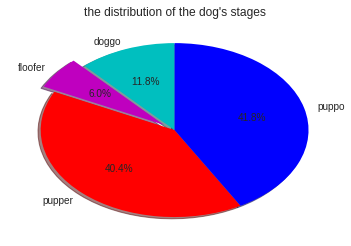

In [6]:
#plot the number of each dog stage in a bar function
cols = ['c','m','r','b']
plt.pie(df_stage,
  labels=['doggo', 'floofer', 'pupper', 'puppo'],
  colors=cols,
  startangle=90,
  shadow= True,
  explode=(0,0.1,0,0),
  autopct='%1.1f%%')
 
plt.title("the distribution of the dog's stages")

#### Insights

From this plot:

1.the dog stage that has the most number of tweets on WeRateDogs is the puppo, then pupper.

2.the dog stage that has the lowest number of tweets on WeRateDogs is the floofer. 

In [7]:
#create a new series store in it the count of the values of gender
df_gender = df.groupby('gender')['tweet_id'].count()
df_gender

gender
female     338
male      1012
Name: tweet_id, dtype: int64

#### Visualization

Text(0.5,1,"the distribution of the dog's gender")

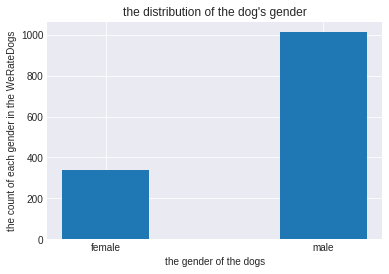

In [8]:
#plot the gender of dogs in a bar function 
plt.bar(np.arange(2), df_gender, width = .4)
plt.xticks(np.arange(2), ('female', 'male'))
plt.xlabel('the gender of the dogs')
plt.ylabel('the count of each gender in the WeRateDogs')
plt.title("the distribution of the dog's gender")

#### Insights

From this plot : the males dogs  has more tweets than the females dogs, within more than two times.

### Bivariate Analysis

My question is :is there a relationship between the number of likes and the total rating 

#### Visualization

(0, 2)

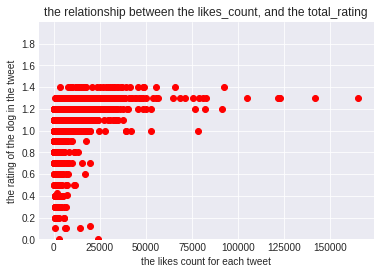

In [9]:
#plot the relationship between the likes_count, and the total_rating in a scatter plot
plt.scatter(df['likes_count'],df['total_rating'],color='r')
plt.yticks(np.arange(0,2,.2))
plt.title('the relationship between the likes_count, and the total_rating')
plt.xlabel('the likes count for each tweet')
plt.ylabel('the rating of the dog in the tweet')
plt.ylim(bottom = 0,top = 2) # initialize limits for y axis to remove the outlierslike 175,6

In [16]:
#Correlation coefficient between likes_count and total_rating
df['likes_count'].corr(df['total_rating'])

0.021884993971026528

#### Insights

From this plot : we can see that there isn't a linear relationship between the rating and the number of likes for each tweet,
but we can notice clearly that the tweets which have a number of likes more than 50,000 have a rating 1 or more. 

My question now: is there a linear relationship between the likes count and the retweet count

#### Visualization

Text(0,0.5,'the retweets count for each tweet')

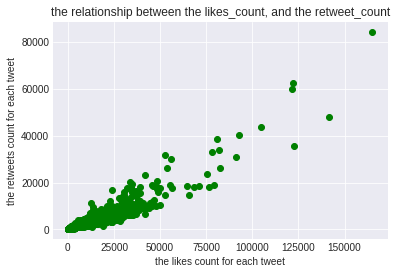

In [17]:
#plot the relationship between the likes_count, and the retweet_count in a scatter plot
plt.scatter(df['likes_count'],df['retweet_count'],color='g')
plt.title('the relationship between the likes_count, and the retweet_count')
plt.xlabel('the likes count for each tweet')
plt.ylabel('the retweets count for each tweet')

In [18]:
#calculate the correlation coefficient
df['likes_count'].corr(df['retweet_count'])

0.92903540233298643

#### Insights

From this plot : there is a clear linear relationship between the number of likes and the number of retweets, and that is normal.

### Multivariate Analysis

My question now: can the dog stage make the total rating and likes count relationship better?

In [19]:
#create new dataframe that has each dog stage a total rating and each rating has the median value of the likes count
df_likes_stage =pd.DataFrame({'likes_count' : df.groupby(['dog_stage','total_rating'])['likes_count'].median()}).reset_index()
#store the dog stages in a list to iterate over next
stages_list = df_likes_stage.dog_stage.unique().tolist()
#show the new dataframe
df_likes_stage

,dog_stage,total_rating,likes_count
0,doggo,0.800000,3792.0
1,doggo,1.000000,5643.0
2,doggo,1.100000,9190.0
3,doggo,1.200000,19618.0
4,doggo,1.300000,13127.0
5,doggo,1.400000,15486.5
6,floofer,1.000000,8576.5
7,floofer,1.100000,5150.0
8,floofer,1.200000,6298.0
9,floofer,1.300000,16591.0


#### Visualization

Text(0,0.5,'the count of likes')

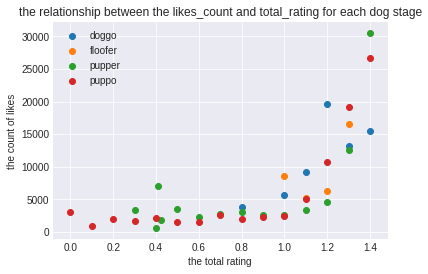

In [20]:
#iterate over stages to plot a scatter plot for each stage that put the total_rating at x-axis and likes_count at y-axis
for item in stages_list:
    #filter the rows that have a dog_stage equals to the item in each iteration
    df_query = df_likes_stage[df_likes_stage['dog_stage'] == item] 
    #plot a scatterplot for each iteration 
    plt.scatter(df_query['total_rating'], df_query['likes_count'])
#put the legends on plot
plt.gca().legend(('doggo','floofer','pupper','puppo'))

plt.title('the relationship between the likes_count and total_rating for each dog stage')
plt.xlabel('the total rating')
plt.ylabel('the count of likes')

#### Insights

From this plot, we can say on average that just the pupper and puppo dogs have a rating less that 0.8.
We can notice the exponential relationship between the rating and number of likes.

In [48]:
#filter the highest retweet count for each stage
idx = df.groupby(['dog_stage'])['retweet_count'].transform(max) == df['retweet_count']
df[idx]
#you will see them in the analysis report

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,likes_count,retweet_count,user_name,favorited,jpg_url,img_num,gender,reply?,total_rating,breed
1742,2049,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,NaN,doggo,165068.0,84389.0,WeRateDogs™,False,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,1.0,NaN,0,1.3,Labrador_retriever
1752,2062,776218204058357768,2016-09-15 00:36:55,Twitter for iPhone,Atlas rolled around in some chalk and now he's a magical rainbow floofer. 13/10 please never take a bath https://t.co/nzqTNw0744,"https://twitter.com/dog_rates/status/776218204058357768/photo/1,https://twitter.com/dog_rates/status/776218204058357768/photo/1,https://twitter.com/dog_rates/status/776218204058357768/photo/1",NaN,floofer,32210.0,17573.0,WeRateDogs™,False,https://pbs.twimg.com/media/CsWuVEdWcAAqbe9.jpg,1.0,male,0,1.3,Samoyed
1932,2279,866450705531457537,2017-05-22 00:28:40,Twitter for iPhone,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr","https://twitter.com/dog_rates/status/866450705531457537/photo/1,https://twitter.com/dog_rates/status/866450705531457537/photo/1",Jamesy,pupper,122761.0,35748.0,WeRateDogs™,False,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,2.0,male,0,1.3,French_bulldog
1982,2342,822872901745569793,2017-01-21 18:26:02,Twitter for iPhone,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,https://twitter.com/dog_rates/status/822872901745569793/photo/1,NaN,puppo,141410.0,48151.0,WeRateDogs™,False,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1.0,NaN,0,1.3,Lakeland_terrier


## Resources

https://www.stackoverflow.com

http://pandas.pydata.org/

https://www.petwave.com/Dogs/Breeds.aspx?az=E